In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# Configure Chrome options
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run headless Chrome for scraping without GUI
chrome_options.add_argument("--disable-gpu")

In [3]:
#Initialize Selenium WebDriver
driver_service = Service('C:/Users/user/Downloads/chromedriver-win64/chromedriver.exe')

In [4]:
driver = webdriver.Chrome(service=driver_service, options=chrome_options)

In [5]:
# Open Jumia Tech Week page
driver.get('https://www.jumia.co.ke/mlp-tech-week/')

In [6]:
# Wait for products to load
wait = WebDriverWait(driver, 10)
wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'article.prd._fb.col.c-prd')))

[<selenium.webdriver.remote.webelement.WebElement (session="6321b887df15f610a6b3300d8747c489", element="f.BE5B8CC998362A2AE595D06CA5E53546.d.57C8C3F5B984E960AF3C516703DB0081.e.33")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6321b887df15f610a6b3300d8747c489", element="f.BE5B8CC998362A2AE595D06CA5E53546.d.57C8C3F5B984E960AF3C516703DB0081.e.34")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6321b887df15f610a6b3300d8747c489", element="f.BE5B8CC998362A2AE595D06CA5E53546.d.57C8C3F5B984E960AF3C516703DB0081.e.35")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6321b887df15f610a6b3300d8747c489", element="f.BE5B8CC998362A2AE595D06CA5E53546.d.57C8C3F5B984E960AF3C516703DB0081.e.36")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6321b887df15f610a6b3300d8747c489", element="f.BE5B8CC998362A2AE595D06CA5E53546.d.57C8C3F5B984E960AF3C516703DB0081.e.37")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6321b887df15f610a6b3300d8

In [7]:
# Extract page source and parse with BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [8]:
# Close the driver
driver.quit()

In [9]:
# Extract product details
products = soup.find_all('article', class_='prd _fb col c-prd')
data = []

In [10]:
for product in products:
    try:
        title = product.find('h3', class_='name').text.strip()
    except:
        title = None

    try:
        price = product.find('div', class_='prc').text.strip()
    except:
        price = None

    try:
        old_price = product.find('div', class_='old').text.strip() if product.find('div', class_='old') else None
    except:
        old_price = None
    try:
        discount = product.find('div', class_='bdg _dsct _sm').text.strip() if product.find('div', class_='bdg _dsct _sm') else None
    except:
        discount = None

    try:
        rating = product.find('div', class_='stars _s').text.strip() if product.find('div', class_='stars _s') else None
    except:
        rating = None

    product_data = {
        'title': title,
        'price': price,
        'old_price': old_price,
        'discount': discount,
        'rating': rating
    }
    data.append(product_data)


In [11]:
# Convert to DataFrame and save to CSV
df = pd.DataFrame(data)
df.to_csv('jumia_techweek_products.csv', index=False)

print(df)

                                                title       price  \
0   AILYONS HD-199A Electric Dry Iron Box Silver &...     KSh 929   
1   RichRipple LED Display Bluetooth Headsets 9D S...     KSh 519   
2   Vitron HTC4388FS - 43" Smart Android Frameless...  KSh 19,799   
3   AILYONS FK-0310 Stainless Steel 2.2L Electric ...     KSh 902   
4   Hikers 32'' Inch Frameless Android Smart HD LE...  KSh 11,328   
5   RichRipple Pro3 Bluetooth Headsets Wireless Po...     KSh 499   
6                      Starlink Standard Actuated Kit  KSh 45,500   
7   AILYONS TYB-205 Blender 2In1 With GrinderMachi...   KSh 1,699   
8   AILYONS LST3208W 32" Smart Android FHD Framele...  KSh 11,499   
9   AILYONS FK-0306 Stainless Steel 1.8L Electric ...     KSh 738   
10  Samsung GALAXY A15, 6.5'' HD+, 4GB RAM + 128GB...  KSh 15,678   
11  Lyons FY-1731 Blender 2 In 1 With Grinder Mach...   KSh 1,599   
12  RichRipple Rechargeable 2.4G Wireless Slient M...     KSh 406   
13  Vitron HTC3200S,32"Inch Framel

In [12]:
df.shape

(40, 5)

In [13]:
df.columns

Index(['title', 'price', 'old_price', 'discount', 'rating'], dtype='object')

In [26]:
# Convert price and old price to numeric and remove non-numeric characters and convert to float
df['price'] = df['price'].str.replace('Ksh', '').str.replace(',', '').astype(float)
df['old_price'] = df['old_price'].str.replace('Ksh','').str.replace(',','').astype(float)

AttributeError: Can only use .str accessor with string values!

In [17]:
df['disc']=pd.to_numeric(df['price'].str.replace(',',''), errors='coerce')

In [22]:
df

,title,price,old_price,discount,rating,Discount Percentage
0,AILYONS HD-199A Electric Dry Iron Box Silver &...,NaN,NaN,NaN,3.8 out of 5,NaN
1,RichRipple LED Display Bluetooth Headsets 9D S...,NaN,NaN,NaN,3.7 out of 5,NaN
2,"Vitron HTC4388FS - 43"" Smart Android Frameless...",NaN,NaN,NaN,3.9 out of 5,NaN
3,AILYONS FK-0310 Stainless Steel 2.2L Electric ...,NaN,NaN,NaN,3.9 out of 5,NaN
4,Hikers 32'' Inch Frameless Android Smart HD LE...,NaN,NaN,NaN,4 out of 5,NaN
5,RichRipple Pro3 Bluetooth Headsets Wireless Po...,NaN,NaN,NaN,4.1 out of 5,NaN
6,Starlink Standard Actuated Kit,NaN,NaN,NaN,4.8 out of 5,NaN
7,AILYONS TYB-205 Blender 2In1 With GrinderMachi...,NaN,NaN,NaN,4.1 out of 5,NaN
8,"AILYONS LST3208W 32"" Smart Android FHD Framele...",NaN,NaN,NaN,4.1 out of 5,NaN
9,AILYONS FK-0306 Stainless Steel 1.8L Electric ...,NaN,NaN,NaN,4 out of 5,NaN


In [20]:
# Calculate the discount percentage
df['Discount Percentage'] = ((df['old_price'] - df['price']) * 100)

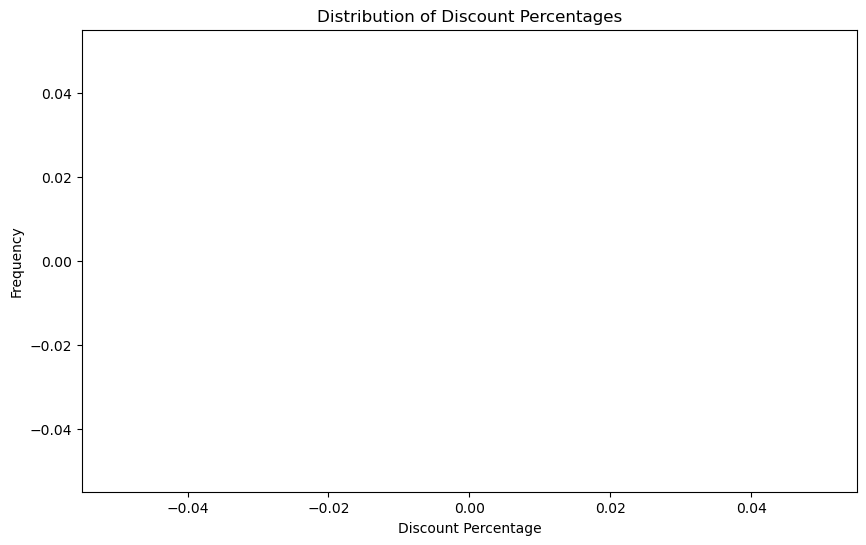

In [21]:
# Plotting the distribution of discounts
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Discount Percentage'].dropna(), bins=30)
plt.title('Distribution of Discount Percentages')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.show()